In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv('train.csv')

In [42]:
df.shape

(404290, 6)

In [43]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [44]:
new_df=df.sample(30000,random_state=2)

In [45]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [46]:
new_df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

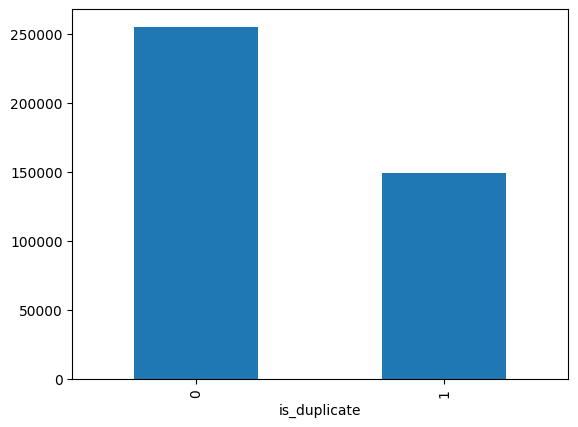

In [47]:
# distribution of duplicate and non duplicate QUESTIONS 
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [48]:
# feature engineering

new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [49]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  
398782      76      77  
115086      49      57  
327711     105     120  
367788      59     146  
151235      35      50

In [50]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))

In [51]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
398782      76      77            12            12  
115086      49      57            12            15  
327711     105     120            25            17  
367788      59     146            12            30  
151235      35      50             5             9

In [52]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [53]:
new_df['words_common']=new_df.apply(common_words,axis=1)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  words_common  
398782      76      77            12            12            11  
115086      49      57            12            15             7  
327711     105     120            25            17             2  
367788      59     146            12            30             0  
151235      35      50             5             9             3

In [54]:
def total_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [55]:
new_df['words_total']=new_df.apply(common_words,axis=1)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  words_common  words_total  
398782      76      77            12            12            11           11  
115086      49      57            12            15             7            7  
327711     105     120            25            17             2            2  
367788      59     146            12            30             0            0  
151235      35      50             5             9             3            3

In [56]:
new_df['word_share']=round(new_df['words_common']/new_df['words_total'],2)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  words_common  words_total  \
398782      76      77            12            12            11           11   
115086      49      57            12            15             7            7   
327711     105     120            25            17             2            2   
367788      59     146            12            30             0            0   
151235      35      50             5             9             3            3   

        word_share  
398782         1.0  
115086         1.0  
327711         1.0  
367788         NaN  
151235         1.0

In [57]:
ques_df=new_df[['question1','question2']]
ques_df.head()

question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  
398782  What is the best marketing automation tool for...  
115086  I am quite poor and I want to be very rich. Wh...  
327711  T.I.E.T to Thapar University to Thapar Univers...  
367788  My boyfriend doesnt feel guilty when he hurts ...  
151235  What was the reason behind the Bhopal gas trag...

In [59]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
398782             1      76      77            12            12   
115086             0      49      57            12            15   
327711             0     105     120            25            17   
367788             0      59     146            12            30   
151235             0      35      50             5             9   

        words_common  words_total  word_share  
398782            11           11         1.0  
115086             7            7         1.0  
327711             2            2         1.0  
367788             0            0         NaN  
151235             3            3         1.0

In [63]:
# BOW on question_df
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
# Transform the questions into a feature matrix
question_vectors = cv.fit_transform(questions).toarray()

# Split the vectors into two arrays
q1_arr, q2_arr = np.vsplit(question_vectors, 2)

In [64]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [65]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
398782             1      76      77            12            12   
115086             0      49      57            12            15   
327711             0     105     120            25            17   
367788             0      59     146            12            30   
151235             0      35      50             5             9   

        words_common  words_total  word_share  0  1  ...  2990  2991  2992  \
398782            11           11         1.0  0  0  ...     0     0     0   
115086             7            7         1.0  0  0  ...     0     0     0   
327711             2            2         1.0  0  0  ...     0     0     0   
367788             0            0         NaN  0  0  ...     0     0     0   
151235             3            3         1.0  0  0  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
398782     0     0     0     0     0     0     0  
115086     0     0     0     0     0     0     0  
327711     0     0     0     0     0     0     0  
367788     1     0     0     0     0     0     0  
151235     0     0     0     0     0     0     0  

[5 rows x 6008 columns]

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train , y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7651666666666667

In [70]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.7556666666666667